Лабораторная работа №2  
  
Stroke Prediction Dataset 
   
Источник данных:  
https://www.kaggle.com/datasets/fedesoriano/ stroke-prediction-dataset?resource=download&select=healthcare-dataset-stroke-data.csv

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date

dataset = pd.read_csv('/Users/HP Pavilion/Desktop/dataForLab1.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,5,1,228.69,36.6,1,1
1,51676,1,61.0,0,0,1,4,0,202.21,NaN,0,1
2,31112,0,80.0,0,1,1,5,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,5,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,0,1


1) Добавление нового атрибута  

In [89]:
# В качестве нового атрибута возьмем год рождения пациента, который вычислим исходя из возраста

dataset['year_of_birth'] = dataset.apply(lambda row: int(date.today().year - row['age']), axis=1)
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year_of_birth
0,9046,0,67.0,0,1,1,5,1,228.69,36.6,1,1,1956
1,51676,1,61.0,0,0,1,4,0,202.21,NaN,0,1,1962
2,31112,0,80.0,0,1,1,5,0,105.92,32.5,0,1,1943
3,60182,1,49.0,0,0,1,5,1,171.23,34.4,2,1,1974
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,0,1,1944


2) Удаление пропущенных значений, дубликатов, выбросов и т.д.  

In [90]:
# Размер текущего датасета

dataset.shape[0]

5110

In [91]:
# Поиск и удаление пропущенных значений
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
year_of_birth          0
dtype: int64

In [92]:
# В столбце ['bmi'] обнаружено 201 пропущенное значение, удалим данные столбцы

dataset.dropna(inplace = True)

In [93]:
# Размер текущего датасета

dataset.shape[0]

4909

In [94]:
# Далее проверим датасет на наличие дубликатов

dataset.drop_duplicates()
dataset.shape[0]

4909

In [95]:
# Дубликаты отсутствуют.

# В столбце ['smoking_status'] у нас есть 'Unknown' значения. Можно удалить либо такие строки
# из датасета, либо сам столбец. Ввиду достаточной важности данного параметра в этом наборе
# данных и приемлемого количества оставшихся записей, эффективней, вероятнее всего, будет удалить
# записи с 'Unknown' значением

# Так же удалим строки со значением 'Other' в столбце ['gender']

dataset = dataset[dataset.smoking_status != 'Unknown']
dataset = dataset[dataset.gender != 'Other']

<AxesSubplot: title={'center': 'Поиск выбросов'}, xlabel='Атрибуты', ylabel='Значения'>

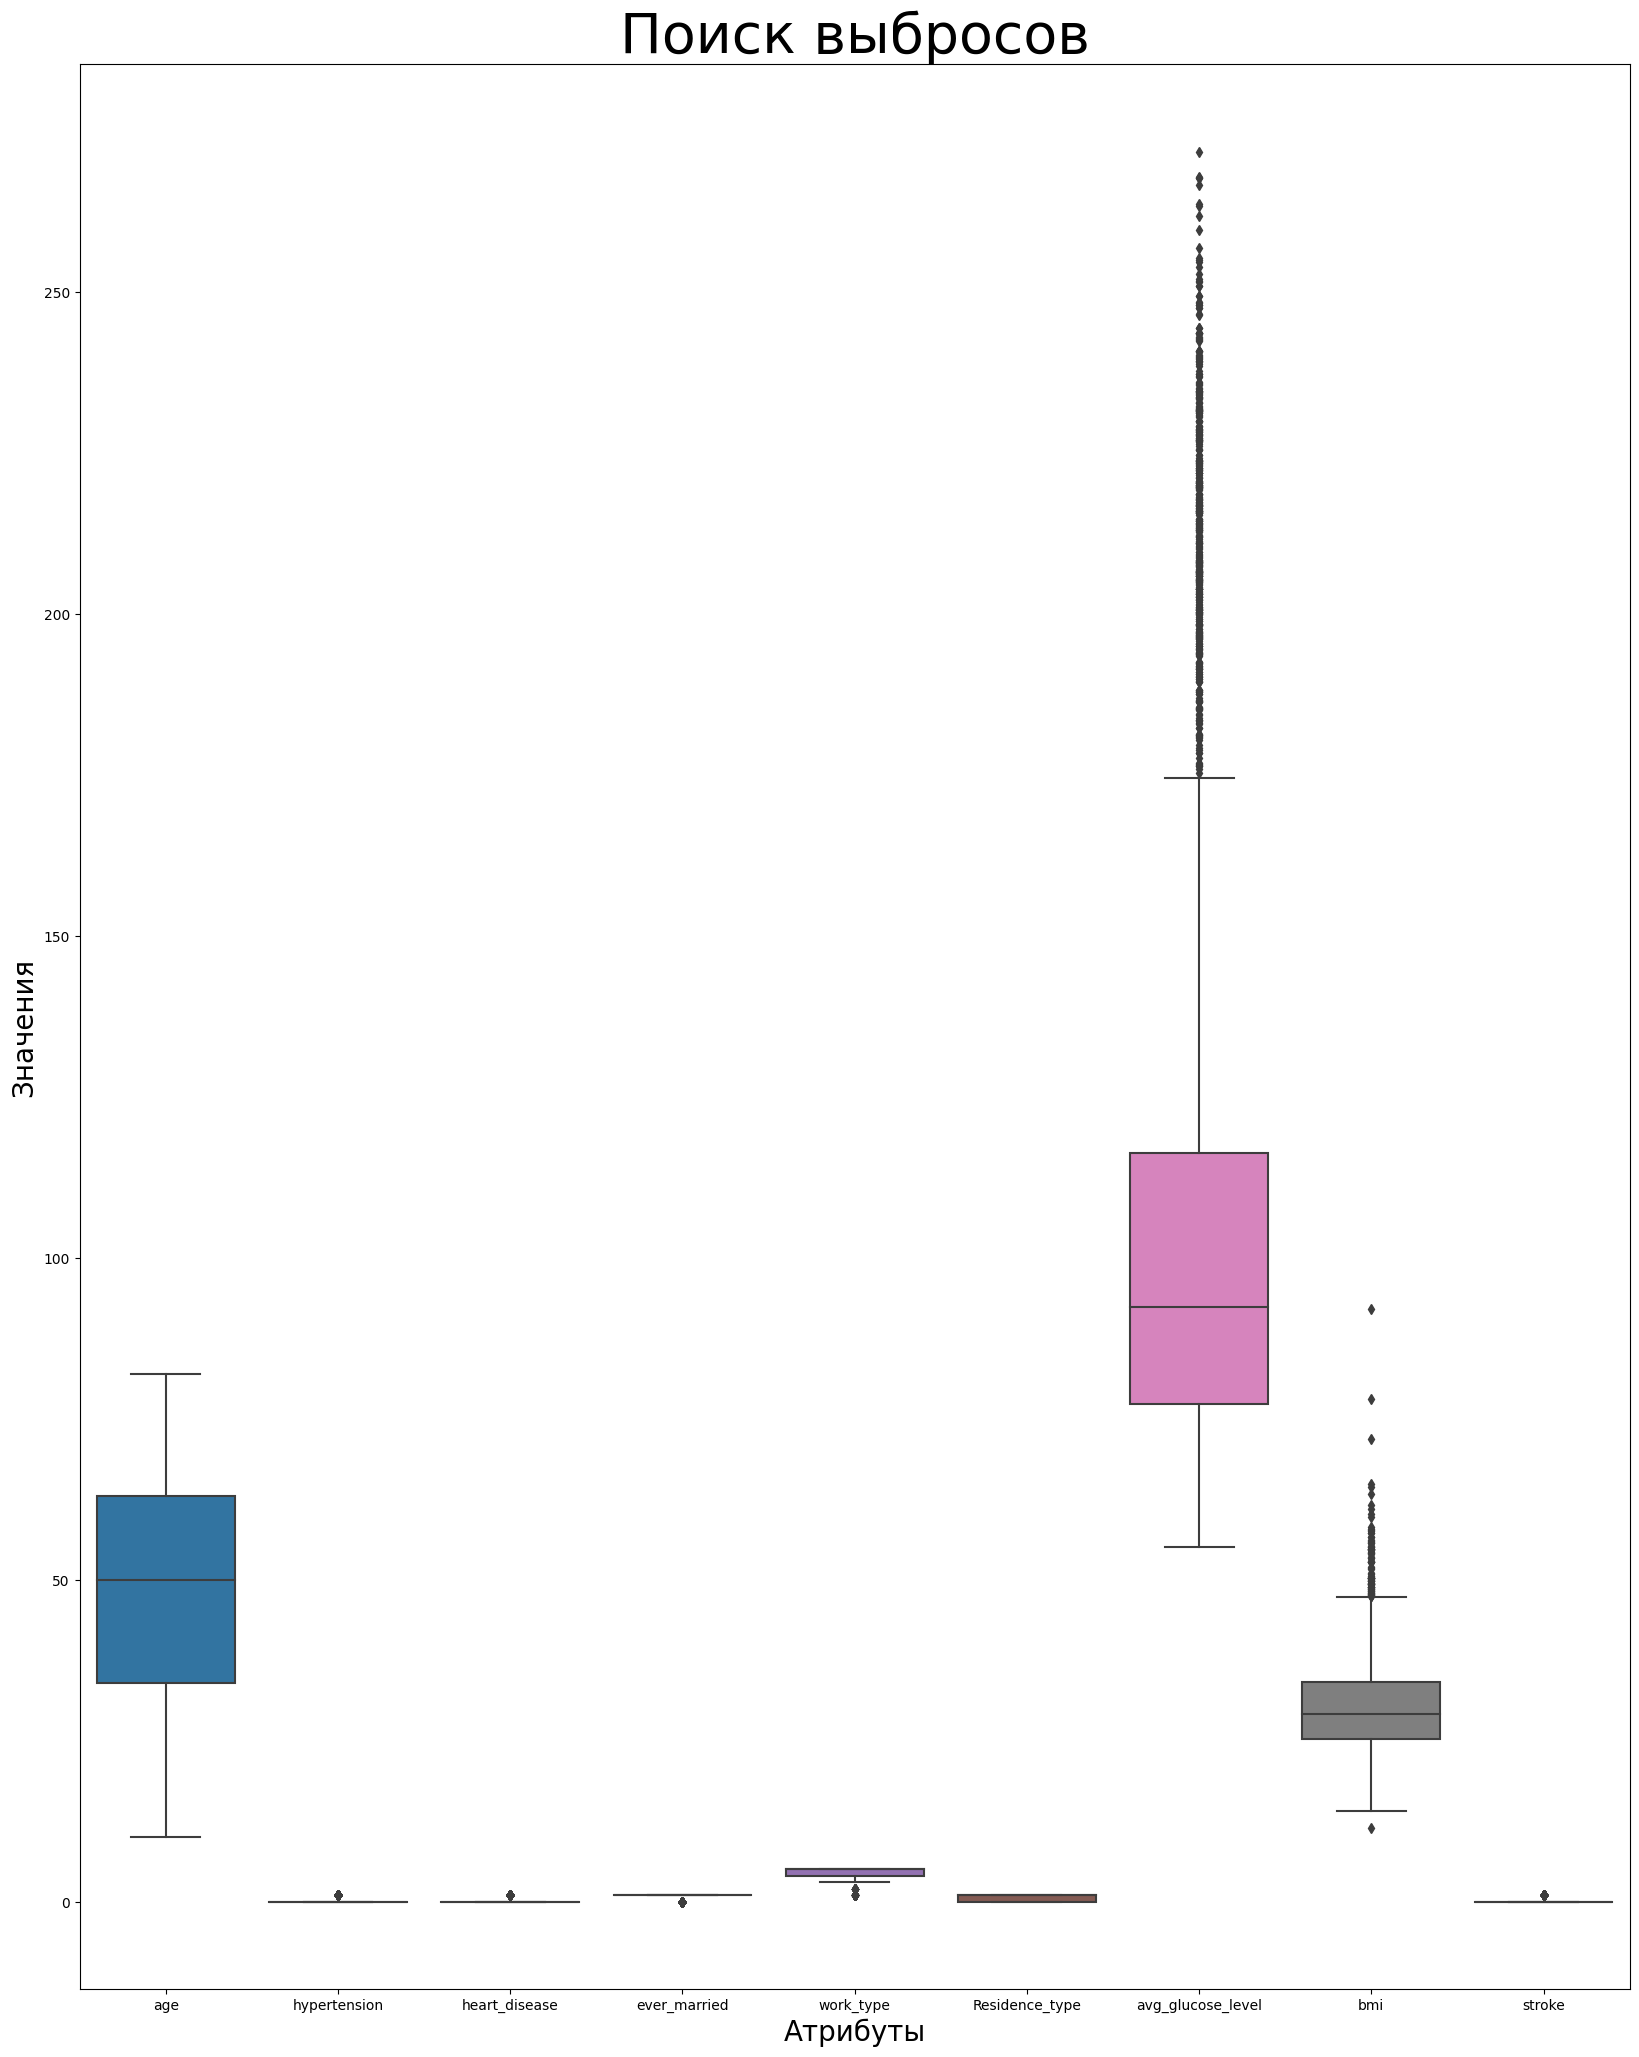

In [97]:
# Найдем выбросы в данном датасете

plt.title('Поиск выбросов', fontsize = 40)
plt.ylabel('Значения', fontsize = 20)
plt.xlabel('Атрибуты', fontsize = 20)
plt.rcParams['figure.figsize'] = [20,25]

sns.boxplot(data = dataset.drop(['id', 'year_of_birth'], axis = 1))

In [98]:
# Атрибуты ['hypertension'], ['heart_disease'], ['ever_married'], ['work_type'], ['avg_glucose_level'],
# ['bmi'] и ['stroke'] имеют выбросы.
 
# Удалим выбросы для данных атрибутов

# ['hypertension']
Q1 = dataset['hypertension'].quantile(0.05)
Q3 = dataset['hypertension'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['hypertension'] >= Q1 - 1.5 * IQR) & 
                  (dataset['hypertension'] <= Q3 + 1.5 * IQR)]

# ['heart_disease']
Q1 = dataset['heart_disease'].quantile(0.05)
Q3 = dataset['heart_disease'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['heart_disease'] >= Q1 - 1.5 * IQR) & 
                  (dataset['heart_disease'] <= Q3 + 1.5 * IQR)]

# ['ever_married']
Q1 = dataset['ever_married'].quantile(0.05)
Q3 = dataset['ever_married'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['ever_married'] >= Q1 - 1.5 * IQR) & 
                  (dataset['ever_married'] <= Q3 + 1.5 * IQR)]

# ['work_type']
Q1 = dataset['work_type'].quantile(0.05)
Q3 = dataset['work_type'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['work_type'] >= Q1 - 1.5 * IQR) & 
                  (dataset['work_type'] <= Q3 + 1.5 * IQR)]

# ['avg_glucose_level']
Q1 = dataset['avg_glucose_level'].quantile(0.05)
Q3 = dataset['avg_glucose_level'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['avg_glucose_level'] >= Q1 - 1.5 * IQR) & 
                  (dataset['avg_glucose_level'] <= Q3 + 1.5 * IQR)]


# ['bmi']
Q1 = dataset['bmi'].quantile(0.05)
Q3 = dataset['bmi'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['bmi'] >= Q1 - 1.5 * IQR) & 
                  (dataset['bmi'] <= Q3 + 1.5 * IQR)]


# ['stroke']
Q1 = dataset['stroke'].quantile(0.05)
Q3 = dataset['stroke'].quantile(0.95)
IQR = Q3 - Q1
dataset = dataset[(dataset['stroke'] >= Q1 - 1.5 * IQR) & 
                  (dataset['stroke'] <= Q3 + 1.5 * IQR)]

In [99]:
# Размер датасета после "причесывания"

dataset.shape[0]

3424

3) Графики зависимости одной переменной от другой  

In [100]:
plt.rcParams['figure.figsize'] = [8,5]

<AxesSubplot: xlabel='age', ylabel='avg_glucose_level'>

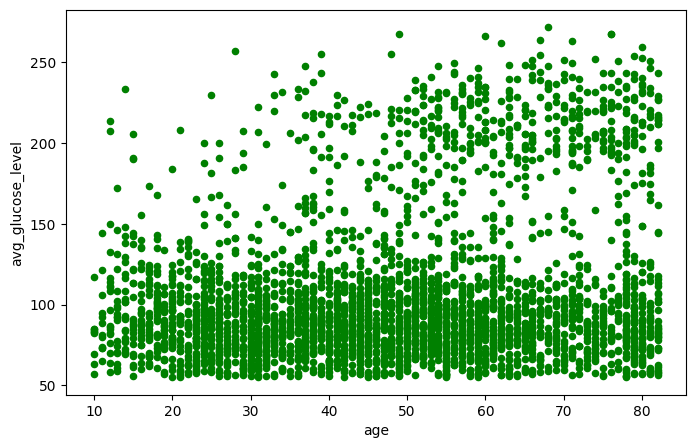

In [101]:
#В коде приведены только графики с наиболее выраженными группами

dataset.plot.scatter(x = 'age', y = 'avg_glucose_level', c = 'green')

<AxesSubplot: xlabel='age', ylabel='bmi'>

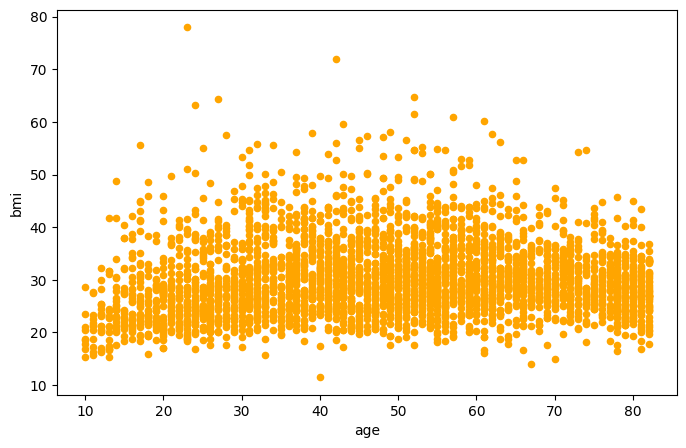

In [102]:
dataset.plot.scatter(x = 'age', y = 'bmi', c = 'orange')

<AxesSubplot: xlabel='avg_glucose_level', ylabel='bmi'>

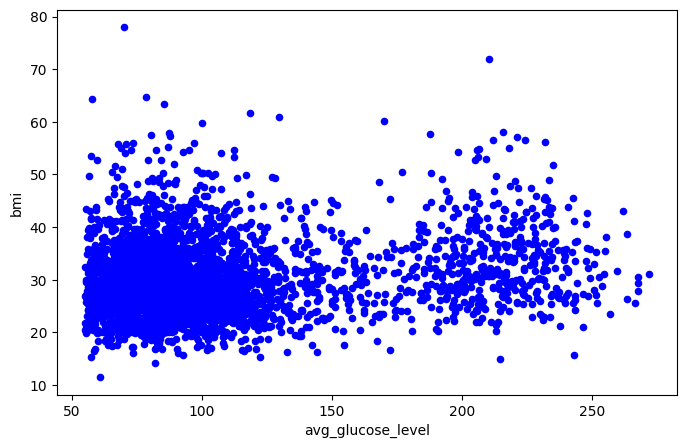

In [103]:
dataset.plot.scatter(x = 'avg_glucose_level', y = 'bmi', c = 'blue')

4) Применение метода KMeans  

In [107]:
# Нормализация данных
from sklearn.cluster import KMeans
from sklearn import preprocessing

minmax_processed = preprocessing.MinMaxScaler().fit_transform(dataset)
dataset_scaled = pd.DataFrame(minmax_processed, index = dataset.index, columns = dataset.columns)
dataset_scaled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year_of_birth
0,0.123052,0.0,0.791667,0.0,1.0,1.0,1.00,1.0,0.801265,0.377444,0.5,1.0,0.208333
2,0.426027,0.0,0.972222,0.0,1.0,1.0,1.00,0.0,0.234512,0.315789,0.0,1.0,0.027778
3,0.825171,1.0,0.541667,0.0,0.0,1.0,1.00,1.0,0.536008,0.344361,1.0,1.0,0.458333
4,0.021708,1.0,0.958333,1.0,0.0,1.0,0.75,0.0,0.549349,0.187970,0.0,1.0,0.041667
5,0.776936,0.0,0.986111,0.0,0.0,1.0,1.00,1.0,0.605161,0.263158,0.5,1.0,0.013889


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

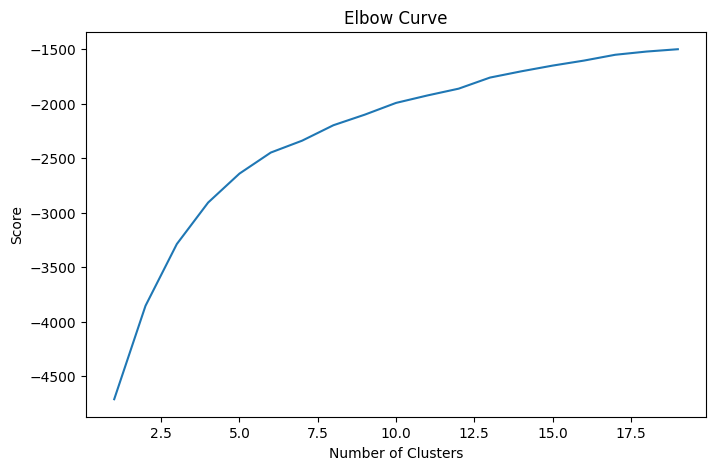

In [108]:
# Применение метода

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(dataset_scaled).score(dataset_scaled) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [109]:
# Fit K-Means clustering for k = 7

kmeans = KMeans(n_clusters = 7)
kmeans.fit(dataset_scaled)


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [110]:
len(kmeans.labels_)

3424

In [111]:
dataset['cluster'] = kmeans.labels_
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year_of_birth,cluster
0,9046,0,67.0,0,1,1,5,1,228.69,36.6,1,1,1956,6
2,31112,0,80.0,0,1,1,5,0,105.92,32.5,0,1,1943,0
3,60182,1,49.0,0,0,1,5,1,171.23,34.4,2,1,1974,1
4,1665,1,79.0,1,0,1,4,0,174.12,24.0,0,1,1944,4
5,56669,0,81.0,0,0,1,5,1,186.21,29.0,1,1,1942,6


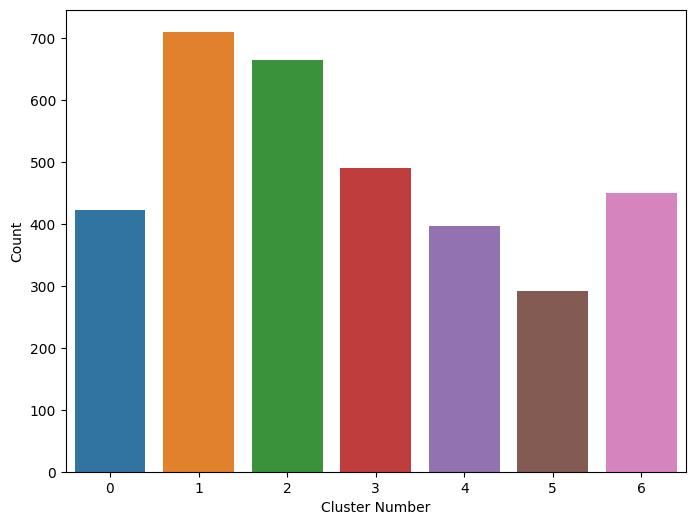

In [121]:
# Размеры кластеров

plt.figure(figsize=(8,6))
axis = sns.barplot(x=np.arange(0,7,1),y = dataset.groupby(['cluster']).count()['id'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Count")

In [123]:
# Статистика кластеров

dataset.groupby(['cluster']).mean()

C:\Users\HP Pavilion\AppData\Local\Temp\ipykernel_16736\2019919025.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['cluster']).mean()


,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,year_of_birth
cluster,,,,,,,,,,,
0,37669.007092,54.416076,0.000000,0.089835,0.990544,4.489362,0.000000,113.361537,30.485816,0.056738,1968.583924
1,38310.384507,51.949296,0.000000,0.038028,0.994366,4.450704,1.000000,104.814704,30.323521,0.046479,1971.050704
2,37057.945783,51.740964,0.000000,0.043675,1.000000,4.486446,0.000000,106.537530,30.718825,0.048193,1971.259036
3,36597.573469,29.904082,0.012245,0.014286,0.000000,4.379592,0.506122,95.203571,28.189184,0.010204,1993.095918
4,37284.828283,63.204545,1.000000,0.136364,0.919192,4.404040,0.502525,131.191263,32.584596,0.143939,1959.795455
5,36740.872852,27.175258,0.017182,0.013746,0.000000,4.175258,0.474227,98.515739,28.200344,0.006873,1995.824742
6,37078.637778,54.997778,0.000000,0.104444,0.988889,4.457778,1.000000,112.288244,30.920667,0.060000,1968.002222


In [130]:
# Размеры кластеров

size_array = list(dataset.groupby(['cluster']).count()['id'].values)
size_array

[423, 710, 664, 490, 396, 291, 450]

In [146]:
# Рассмотрим подробнее некоторые кластеры

dataset[dataset['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year_of_birth,cluster
829,26999,0,61.0,1,1,1,3,0,86.06,34.8,0,0,1962,4
217,29552,1,55.0,1,1,1,5,1,210.40,40.0,2,1,1968,4
3014,35716,1,55.0,1,0,1,5,1,202.67,40.4,1,0,1968,4
5100,68398,0,82.0,1,0,1,4,0,71.97,28.3,0,0,1941,4
35,712,1,82.0,1,1,0,5,0,84.03,26.5,1,1,1941,4


В таблице статистики видно, что, например, в кластер под номером 4 входят в основном пожилые люди с гипертонией. В данном кластере высока доля перенесших инсульт, а так же высокий средний уровень глюкозы.

In [153]:
dataset[dataset['cluster']==size_array.index(sorted(size_array)[4])].sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,year_of_birth,cluster
1519,18070,1,27.0,0,0,0,5,0,73.00,20.0,0,0,1996,3
1212,33162,1,23.0,0,0,0,5,0,90.84,31.6,0,0,2000,3
3386,5068,1,28.0,0,0,0,5,1,76.81,28.3,2,0,1995,3
740,52580,1,27.0,0,0,0,5,0,75.04,24.5,0,0,1996,3
2705,60255,1,34.0,0,0,0,5,0,103.43,43.6,2,0,1989,3


В кластер номер 5, напротив, входят в основном молодые люди, у которых в большинстве своем отсутствуют сердечно-сосудистые заболевания, и риск инсульта, соотвественно, ниже.